# Analiza nieobecności pracowników

### Cel: Zrozumienie przyczyn nieobecności pracowników oraz opracowanie strategii zmniejszenie jej wpływu na efektywność i produktywność organizacji.

Analiza nieobecności pracowników. Zrozumienie przyczyn nieobecności oraz opracowanie strategii zmniejszenie jej wpływu na organizacje.

- Źródła nieobecności: Identyfikacja przyczyn nieobecności pracowników, takich jak choroby, stres, konflikty w miejscu pracy, czy inne czynniki.
- Częstotliwość i długość nieobecności: Określenie, jak często i jak długo pracownicy są nieobecni. To może pomóc w identyfikacji trendów i wzorców.
- Skutki dla organizacji: Analiza wpływu nieobecności na wydajność, morale zespołu, satysfakcję pracowników i kulturę organizacyjną.



<b>Dataset:</b> Dane dotyczące absencji w pracy od 2015 do  2018 roku zostały zebrane w firmie kurierskiej.

http://archive.ics.uci.edu/dataset/445/absenteeism+at+work

## Dokumentacja

1. Pewne choroby zakaźne i pasożytnicze
2. Nowotwory
3. Choroby krwi i narządów krwiotwórczych oraz pewne zaburzenia układu immunologicznego
4. Choroby endokrynologiczne, żywieniowe i metaboliczne
5. Choroby psychiczne i zaburzenia behawioralne
6. Choroby układu nerwowego
7. Choroby oka i jego przydatków
8. Choroby ucha i wyrostka sutkowego
9. Choroby układu krążenia
10. Choroby układu oddechowego
11. Choroby układu pokarmowego
12. Choroby skóry i tkanki podskórnej
13. Choroby układu mięśniowo-szkieletowego i tkanki łącznej
14. Choroby układu moczowo-płciowego
15. Ciąża, poród i połóg
16. Pewne stany pochodzenia okołoporodowego
17. Wrodzone wady rozwojowe, zniekształcenia i aberracje chromosomowe
18. Objawy, znaki i nieprawidłowe wyniki kliniczne i laboratoryjne, gdzie indziej niesklasyfikowane
19. Urazy, zatrucia i pewne inne następstwa przyczyn zewnętrznych
20. Zewnętrzne przyczyny zachorowalności i śmiertelności
21. Czynniki wpływające na stan zdrowia i kontakt z usługami zdrowotnymi.
22. Wizyta kontrolna
23. Konsultacje lekarskie
24. Oddawania krwi
25. Badania laboratoryjne
26. Nieuzasadnione nieobecności
27. Fizjoterapia
28. Konsultacje stomatologiczne



# Eksploracyjna Analiza Danych

Import niezbędnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Wczytanie ramki danych

In [2]:
df = pd.read_csv("Absenteeism-data.csv")

Stworzenie slownika z kategoriami absencji.

In [3]:
abs_reasons = {
    1: "Pewne choroby zakaźne i pasożytnicze",
    2: "Nowotwory",
    3: "Choroby krwi i narządów krwiotwórczych oraz pewne zaburzenia układu immunologicznego",
    4: "Choroby endokrynologiczne, żywieniowe i metaboliczne",
    5: "Choroby psychiczne i zaburzenia behawioralne",
    6: "Choroby układu nerwowego",
    7: "Choroby oka i jego przydatków",
    8: "Choroby ucha i wyrostka sutkowego",
    9: "Choroby układu krążenia",
    10: "Choroby układu oddechowego",
    11: "Choroby układu pokarmowego",
    12: "Choroby skóry i tkanki podskórnej",
    13: "Choroby układu mięśniowo-szkieletowego i tkanki łącznej",
    14: "Choroby układu moczowo-płciowego",
    15: "Ciąża, poród i połóg",
    16: "Pewne stany pochodzenia okołoporodowego",
    17: "Wrodzone wady rozwojowe, zniekształcenia i aberracje chromosomowe",
    18: "Objawy, znaki i nieprawidłowe wyniki kliniczne i laboratoryjne, gdzie indziej niesklasyfikowane",
    19: "Urazy, zatrucia i pewne inne następstwa przyczyn zewnętrznych",
    20: "Zewnętrzne przyczyny zachorowalności i śmiertelności",
    21: "Czynniki wpływające na stan zdrowia i kontakt z usługami zdrowotnymi",
    22: "Wizyta kontrolna",
    23: "Konsultacje lekarskie",
    24: "Oddawania krwi",
    25: "Badania laboratoryjne",
    26: "Nieuzasadnione nieobecności",
    27: "Fizjoterapia",
    28: "Konsultacje stomatologiczne",
    0: "Brak absencji"
}


In [4]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

Wyświetlanie ramki danych oraz informacje

In [5]:
display(df)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,7/7/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [7]:
df2 = df.copy()

In [8]:
df2['Date'] = pd.to_datetime(df2['Date'], format = '%d/%m/%Y')

#### Sprawdzenie duplikatów

In [9]:
#df[df.duplicated(keep=False) == True]
df2[df2.duplicated(keep=False)]

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
121,34,27,2016-01-11,118,10,37,308.593,28,1,0,0,2
123,34,27,2016-01-12,118,10,37,308.593,28,1,0,0,2
124,34,27,2016-01-13,118,10,37,308.593,28,1,0,0,2
127,34,27,2016-01-11,118,10,37,308.593,28,1,0,0,2
128,34,27,2016-01-12,118,10,37,308.593,28,1,0,0,2
131,34,27,2016-01-13,118,10,37,308.593,28,1,0,0,2
304,5,23,2016-10-19,235,20,43,265.017,38,1,1,0,2
305,5,23,2016-10-19,235,20,43,265.017,38,1,1,0,2
385,3,27,2017-02-22,179,51,38,251.818,31,1,0,0,3
386,3,27,2017-02-24,179,51,38,251.818,31,1,0,0,3


In [10]:
df2.drop_duplicates()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,2,2,0,8
696,28,6,2018-05-23,225,26,28,237.656,24,1,1,2,3
697,18,10,2018-05-24,330,16,28,237.656,25,2,0,0,8
698,25,23,2018-05-24,235,16,32,237.656,25,3,0,0,2


Wnioski: Pomimo identycznych wartości w wielu kolumnach, daty są różne. Dlatego te rekordy nie są dokładnymi duplikatami.

Usunięcie kolumny 'ID' pracownika, która nie będzię potrzebna nam w dalszej analizie.

In [11]:
df2 = df2.drop("ID", axis = 1)

## Wstępna analiza oraz wizualizacje

### Przyczyny absencji

In [12]:
df2['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [13]:
len(df2['Reason for Absence'].unique())

28

W danych dotyczących absencji mamy 28 różnych powodów absencji, z których każdy jest oznaczony jako kategoria od 1 do 28.

Jednakże, musimy również uwzględnić kategorię '0', która reprezentuje brak absencji. Łącznie mamy 29 rodzajów absencji.

W zwiazku z tym, że unikalnych wartości mamy tylko 28, oznacza to, że brakuje jednej kategorii.

Aby to sprawdzić potrzebujemy posortować wszystkie kategorie.

In [14]:
sorted(df2['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

Brakuje kategorii numer 20. Zewnętrzne przyczyny zachorowalności i śmiertelności.

In [15]:
most_common_reason = df2['Reason for Absence'].mode().iloc[0]

print(f"Najczęstsza przyczyna nieobecności w pracy to {abs_reasons[most_common_reason]}.")

Najczęstsza przyczyna nieobecności w pracy to Konsultacje lekarskie.



Poniższy wykres kolumnowy przedstawia ilość absencji w podziale na 28 kategorii.

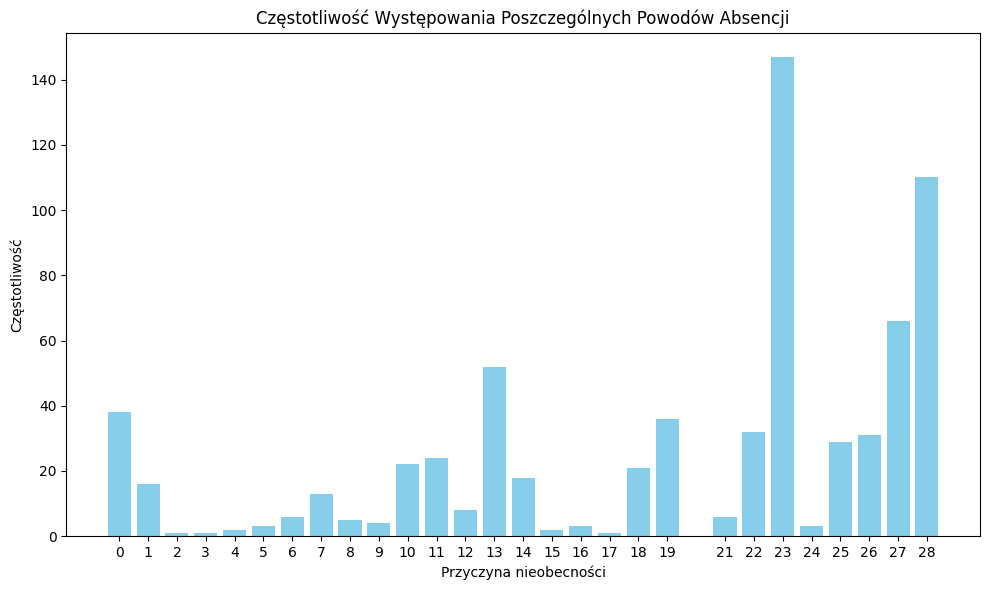

In [16]:
reason_counts = df2['Reason for Absence'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(reason_counts.index, reason_counts.values, color='skyblue')
plt.title('Częstotliwość Występowania Poszczególnych Powodów Absencji')
plt.xlabel('Przyczyna nieobecności')
plt.xticks(reason_counts.index, labels=reason_counts.index)
plt.ylabel('Częstotliwość')
plt.tight_layout()

plt.show()


Wnioski:

Najczęstszymi przyczynami absencji pracowników jest kategoria:
-  23. Konsultacje lekarskie
-  28. Konsultacje stomatologiczne.

### Godziny absencji

Średnia ilość godzin absencji

In [17]:
abs_hours = round(df2['Absenteeism Time in Hours'].mean(), 2)

print(f"Średnia ilość absencji w godzinach wynosi {abs_hours} h.")

Średnia ilość absencji w godzinach wynosi 6.76 h.


Odchylenie standardowe

In [18]:
abs_hours_std = df2['Absenteeism Time in Hours'].std()
abs_hours_std

12.670082283897274

Odchylenie standardowe 12.670082283897274 wskazuje na pewną rozrzutność w danych dotyczących godzin nieobecności.

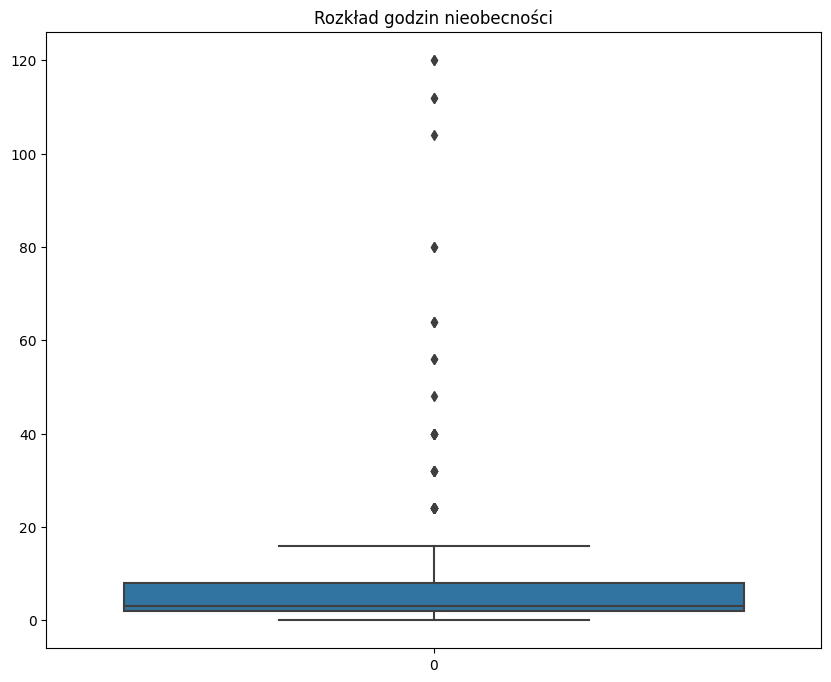

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df2['Absenteeism Time in Hours'])
plt.title("Rozkład godzin nieobecności")
plt.show()

Mediana godzin absencji

In [20]:
abs_hours = df2['Absenteeism Time in Hours'].median()

print(f"Mediana absencji w godzinach wynosi {abs_hours} h.")

Mediana absencji w godzinach wynosi 3.0 h.


#### Edukacja


In [21]:
df2['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

Mamy 4 kategorie wykształcenia.

Dokumentacja:
1. Education (high school (1)
2. graduate (2),
3. postgraduate (3),
4. master and doctor (4))

In [22]:
education_counts = df2['Education'].value_counts()
education_counts

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

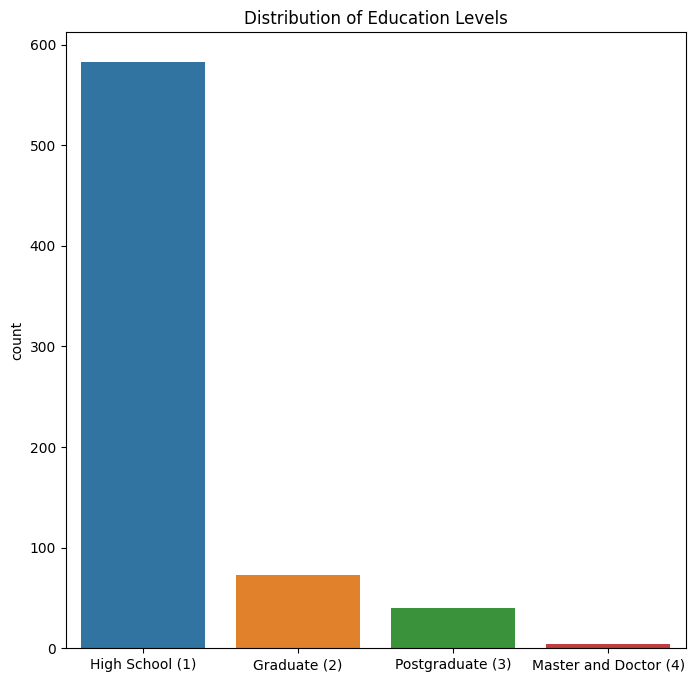

In [23]:
education_labels = ['High School (1)', 'Graduate (2)', 'Postgraduate (3)', 'Master and Doctor (4)']
# zmienić na kolumnowy

plt.figure(figsize=(8, 8))
sns.barplot(x=education_labels, y=education_counts)
plt.title('Distribution of Education Levels')
plt.show()

Wnioski:

Najwięcej pracowników posiada wykształcenie średnie  83.3% (583), najmniej magisterskie lub doktorat 0.6% (4).

#### Daty

W podanym datasecie format daty 07/09/2015 to str.

Zamieniamy date na pojedyncze liczby.

In [24]:
type(df2['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Zmiana daty z formatu 'str' na 'datetime'.

In [25]:
df2['Date'] = pd.to_datetime(df2['Date'], format = '%d/%m/%Y')

In [26]:
df2['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason for Absence         700 non-null    int64         
 1   Date                       700 non-null    datetime64[ns]
 2   Transportation Expense     700 non-null    int64         
 3   Distance to Work           700 non-null    int64         
 4   Age                        700 non-null    int64         
 5   Daily Work Load Average    700 non-null    float64       
 6   Body Mass Index            700 non-null    int64         
 7   Education                  700 non-null    int64         
 8   Children                   700 non-null    int64         
 9   Pets                       700 non-null    int64         
 10  Absenteeism Time in Hours  700 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.3 KB


#### Ekstrakcja miesiąca

In [28]:
df2['Date'][0].month

7

In [29]:
df2.shape

(700, 11)

Stworzenie listy miesięcy w celu dodania ich do ramki danych.

In [30]:
list_months = []

for i in range(df2.shape[0]):
    list_months.append(df2['Date'][i].month)

In [31]:
list_months

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

Stworzenie nowej kolumny z numerem miesiąca.

In [32]:
df2['Month Value'] = list_months

In [33]:
df2.head(20)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,23,2015-07-10,179,51,38,239.554,31,1,0,0,2,7
6,22,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,23,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,19,2015-07-06,155,12,34,239.554,25,1,2,0,40,7
9,22,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


#### Ekstrakcja dni tygodnia

In [34]:
df2['Date'][699].weekday()

3

0: Poniedziałek
1: Wtorek
2: Środa
3: Czwartek
4: Piątek
5: Sobota
6: Niedziela

In [35]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [36]:
df2['Day of the Week'] = df2['Date'].apply(date_to_weekday)

In [37]:
df2

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,6,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,10,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,23,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


In [38]:
df2.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Month Value', 'Day of the Week'],
      dtype=object)

Usuwanie daty

In [39]:
column_names_upd = ['Reason for Absence', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Month Value', 'Day of the Week']

In [40]:
df2 = df2[column_names_upd]
df2

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,26,289,36,33,239.554,30,1,2,1,4,7,1
1,0,118,13,50,239.554,31,1,1,0,0,7,1
2,23,179,51,38,239.554,31,1,0,0,2,7,2
3,7,279,5,39,239.554,24,1,2,0,4,7,3
4,23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,179,22,40,237.656,22,2,2,0,8,5,2
696,6,225,26,28,237.656,24,1,1,2,3,5,2
697,10,330,16,28,237.656,25,2,0,0,8,5,3
698,23,235,16,32,237.656,25,3,0,0,2,5,3


C:\Users\admin\AppData\Local\Temp\ipykernel_4632\85846636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of the Week'] = df2['Day of the Week'].map(days_of_week)


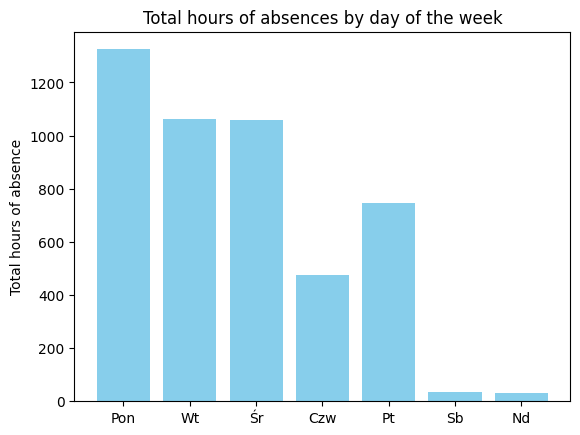

In [41]:
days_of_week = {0: "Pon", 1: "Wt", 2: "Śr", 3: "Czw", 4: "Pt", 5: "Sb", 6: "Nd"}
df2['Day of the Week'] = df2['Day of the Week'].map(days_of_week)

sum_hours_by_day = df2.groupby('Day of the Week')['Absenteeism Time in Hours'].sum()

sum_hours_by_day = sum_hours_by_day.reindex(["Pon", "Wt", "Śr", "Czw", "Pt", "Sb", "Nd"])

plt.bar(sum_hours_by_day.index, sum_hours_by_day.values, color='skyblue')
plt.ylabel('Total hours of absence')
plt.title('Total hours of absences by day of the week')
plt.show()

Wnioski:

Najwięcej nieobecności obserwujemy w poniedziałki.

#### Wiek

In [42]:
min_age = df2['Age'].min()
print(f'Minimal age is {min_age}.')

Minimal age is 27.


In [43]:
max_age = df2['Age'].max()
print(f'Maximum age is {max_age}.')

Maximum age is 58.


In [44]:
df2.groupby('Age').size()

Age
27      7
28    113
29      7
30     41
31     17
32     13
33     48
34     27
36     49
37     70
38    113
39      7
40     55
41     34
43     23
46      1
47     24
48      5
49      5
50     35
58      6
dtype: int64

In [45]:
df2_wiek = df2.copy()
df2_wiek

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,26,289,36,33,239.554,30,1,2,1,4,7,Wt
1,0,118,13,50,239.554,31,1,1,0,0,7,Wt
2,23,179,51,38,239.554,31,1,0,0,2,7,Śr
3,7,279,5,39,239.554,24,1,2,0,4,7,Czw
4,23,289,36,33,239.554,30,1,2,1,2,7,Czw
...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,179,22,40,237.656,22,2,2,0,8,5,Śr
696,6,225,26,28,237.656,24,1,1,2,3,5,Śr
697,10,330,16,28,237.656,25,2,0,0,8,5,Czw
698,23,235,16,32,237.656,25,3,0,0,2,5,Czw


In [46]:
grupy_wiekowe = df2.groupby('Age').size().reset_index(name='Number of Employees')
mediana_godzin_w_wieku = df2.groupby('Age')['Absenteeism Time in Hours'].median().reset_index(name='Absenteeism Time in Hours')

df2_merged_age = pd.merge(grupy_wiekowe,mediana_godzin_w_wieku, on='Age')

df2_merged_age['Median'] = df2_merged_age['Absenteeism Time in Hours'] / df2_merged_age['Number of Employees']




In [47]:
grupy_wiekowe

,Age,Number of Employees
0,27,7
1,28,113
2,29,7
3,30,41
4,31,17
5,32,13
6,33,48
7,34,27
8,36,49
9,37,70


In [48]:
mediana_godzin_w_wieku

,Age,Absenteeism Time in Hours
0,27,2.0
1,28,3.0
2,29,3.0
3,30,2.0
4,31,8.0
5,32,3.0
6,33,8.0
7,34,5.0
8,36,4.0
9,37,3.0


In [49]:
df2_merged_age

,Age,Number of Employees,Absenteeism Time in Hours,Median
0,27,7,2.0,0.285714
1,28,113,3.0,0.026549
2,29,7,3.0,0.428571
3,30,41,2.0,0.048780
4,31,17,8.0,0.470588
5,32,13,3.0,0.230769
6,33,48,8.0,0.166667
7,34,27,5.0,0.185185
8,36,49,4.0,0.081633
9,37,70,3.0,0.042857


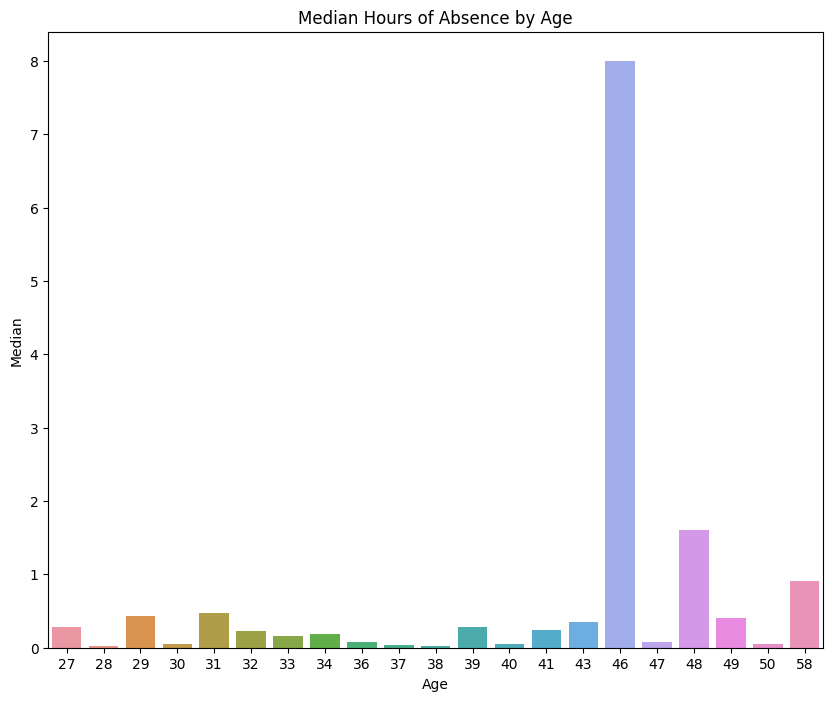

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Age', y='Median', data=df2_merged_age)
plt.title('Median Hours of Absence by Age')
plt.show()

Wnioski:

Najwyższą medianę absencji mają pracownicy w wieku 46 lat.

#### BODY MASS INDEX


In [51]:
sum_by_bmi = df.groupby('Body Mass Index').size().reset_index(name='Number of Employees')

sum_by_bmi

,Body Mass Index,Number of Employees
0,19,41
1,21,17
2,22,32
3,23,75
4,24,84
5,25,118
6,27,22
7,28,52
8,29,22
9,30,39


In [52]:
mediana_godzin_w_bmi = df2.groupby('Body Mass Index')['Absenteeism Time in Hours'].median().reset_index(name='Absenteeism Time in Hours')

df2_merged_bmi = pd.merge(sum_by_bmi, mediana_godzin_w_bmi, on='Body Mass Index' )
df2_merged_bmi['BMI Category'] = pd.cut(df2['Body Mass Index'], bins=[0, 24.9, 29.9, 34.9, 100], labels=['Normal Weight', 'Overweight', 'Obesity Class I', 'Obesity Class II'])
df2_merged_bmi['Median'] = df2_merged_bmi['Absenteeism Time in Hours'] / df2_merged_bmi['Number of Employees']

In [53]:
mediana_godzin_w_bmi

,Body Mass Index,Absenteeism Time in Hours
0,19,2.0
1,21,3.0
2,22,3.0
3,23,4.0
4,24,2.0
5,25,5.0
6,27,8.0
7,28,3.0
8,29,4.0
9,30,8.0


In [54]:
df2_merged_bmi

,Body Mass Index,Number of Employees,Absenteeism Time in Hours,BMI Category,Median
0,19,41,2.0,Obesity Class I,0.048780
1,21,17,3.0,Obesity Class I,0.176471
2,22,32,3.0,Obesity Class I,0.093750
3,23,75,4.0,Normal Weight,0.053333
4,24,84,2.0,Obesity Class I,0.023810
5,25,118,5.0,Obesity Class I,0.042373
6,27,22,8.0,Overweight,0.363636
7,28,52,3.0,Normal Weight,0.057692
8,29,22,4.0,Overweight,0.181818
9,30,39,8.0,Overweight,0.205128


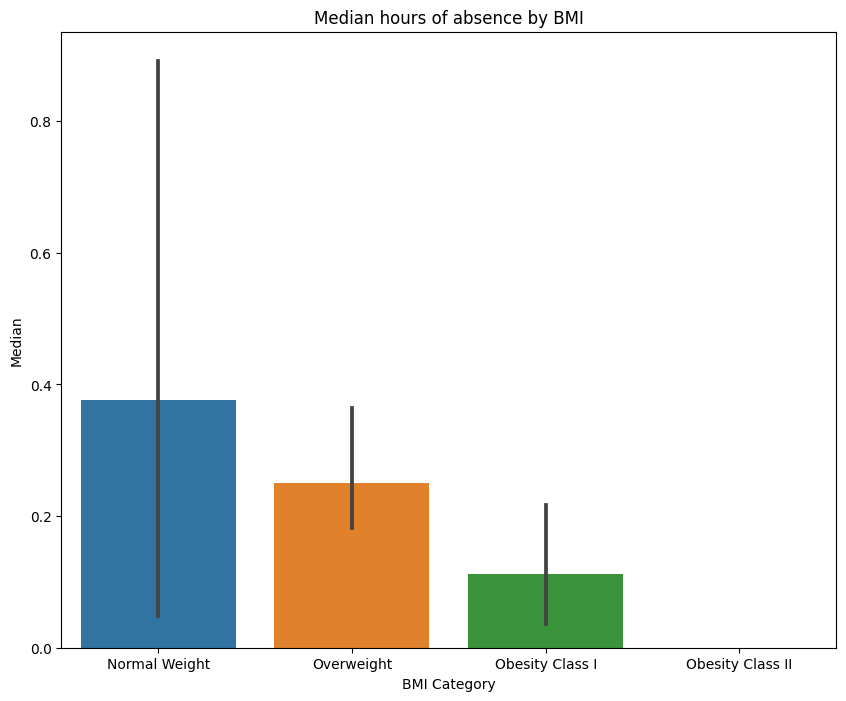

In [55]:
plt.figure(figsize=(10, 8))
sns.barplot(x='BMI Category', y='Median', data=df2_merged_bmi)
plt.title('Median hours of absence by BMI')
plt.show()

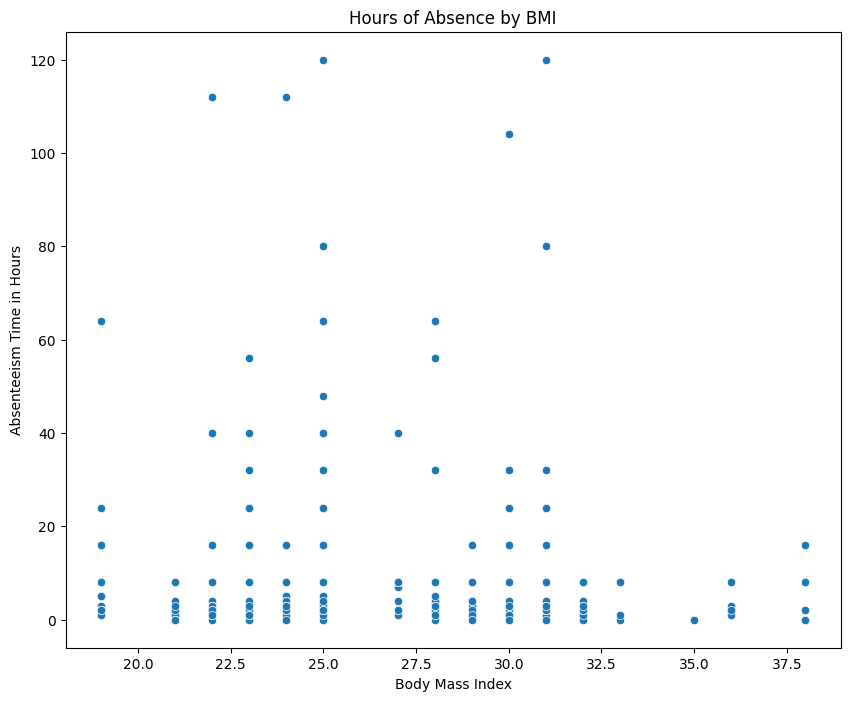

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Body Mass Index', y='Absenteeism Time in Hours', data=df2)
plt.title('Hours of Absence by BMI')
plt.show()

### Reason for Absence

#### Funkcja get_dummies()
W bibliotece Pandas jest używana do przekształcania kolumny kategoryczne
na tzw. "dummy variables" (zmienne binarne), co ułatwia analizę danych w kontekście modelowania statystycznego lub uczenia maszynowego.


Przykładowo, jeśli masz kolumnę zawierającą dane kategoryczne, takie jak "kolor" z wartościami "czerwony", "zielony" i "niebieski", funkcja
get_dummies() utworzy osobne kolumny dla każdej unikalnej wartości i przypisze wartości binarne (0 lub 1) w zależności od tego, czy dana
wartość występuje w oryginalnej kolumnie.


In [57]:
reason_columns = pd.get_dummies(df2['Reason for Absence'], dummy_na=False).astype(int)

In [58]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Check

Sprawdzamy czy w każdym rzędzie występuje jedna jedynka.

In [59]:
reason_columns['check'] = reason_columns.sum(axis=1)

In [60]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [61]:
reason_columns['check'].unique()

array([1], dtype=int64)

In [62]:
reason_columns = reason_columns.drop(['check'], axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Wnioski: Tylko wartości '1'. Brak '0' oraz wartości większych od '1'.

In [63]:
df2.columns.values

array(['Reason for Absence', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week'], dtype=object)

In [64]:
reason_columns.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=object)

In [65]:
reason_columns = reason_columns.drop([0], axis=1)

Usuwamy kolumnę 'Reason for Absence', w zamian dodajemy kolumny z dummy data dla kategorii absencji.

In [66]:
df2 = df2.drop(['Reason for Absence'], axis=1)

In [67]:
df2

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,289,36,33,239.554,30,1,2,1,4,7,Wt
1,118,13,50,239.554,31,1,1,0,0,7,Wt
2,179,51,38,239.554,31,1,0,0,2,7,Śr
3,279,5,39,239.554,24,1,2,0,4,7,Czw
4,289,36,33,239.554,30,1,2,1,2,7,Czw
...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,2,2,0,8,5,Śr
696,225,26,28,237.656,24,1,1,2,3,5,Śr
697,330,16,28,237.656,25,2,0,0,8,5,Czw
698,235,16,32,237.656,25,3,0,0,2,5,Czw


### Łączenie ramki danych z kategoriami

In [68]:
df3 = pd.concat([df2, reason_columns], axis=1)

In [69]:
df3

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,...,18,19,21,22,23,24,25,26,27,28
0,289,36,33,239.554,30,1,2,1,4,7,...,0,0,0,0,0,0,0,1,0,0
1,118,13,50,239.554,31,1,1,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2,179,51,38,239.554,31,1,0,0,2,7,...,0,0,0,0,1,0,0,0,0,0
3,279,5,39,239.554,24,1,2,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,289,36,33,239.554,30,1,2,1,2,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,2,2,0,8,5,...,0,0,0,0,0,0,0,0,0,0
696,225,26,28,237.656,24,1,1,2,3,5,...,0,0,0,0,0,0,0,0,0,0
697,330,16,28,237.656,25,2,0,0,8,5,...,0,0,0,0,0,0,0,0,0,0
698,235,16,32,237.656,25,3,0,0,2,5,...,0,0,0,0,1,0,0,0,0,0


#### Zmiana nazw kolumn dla grup

In [70]:
df3.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=object)

In [71]:
column_names = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week', 'reason_type_1',
       'reason_type_2', 'reason_type_3', 'reason_type_4', 'reason_type_5',
       'reason_type_6', 'reason_type_7', 'reason_type_8', 'reason_type_9',
       'reason_type_10', 'reason_type_11', 'reason_type_12',
       'reason_type_13', 'reason_type_14', 'reason_type_15',
       'reason_type_16', 'reason_type_17', 'reason_type_18',
       'reason_type_19', 'reason_type_21', 'reason_type_22',
       'reason_type_23', 'reason_type_24', 'reason_type_25',
        'reason_type_26', 'reason_type_27', 'reason_type_28']

In [72]:
df3.columns = column_names

In [73]:
df2

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,289,36,33,239.554,30,1,2,1,4,7,Wt
1,118,13,50,239.554,31,1,1,0,0,7,Wt
2,179,51,38,239.554,31,1,0,0,2,7,Śr
3,279,5,39,239.554,24,1,2,0,4,7,Czw
4,289,36,33,239.554,30,1,2,1,2,7,Czw
...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,2,2,0,8,5,Śr
696,225,26,28,237.656,24,1,1,2,3,5,Śr
697,330,16,28,237.656,25,2,0,0,8,5,Czw
698,235,16,32,237.656,25,3,0,0,2,5,Czw


#### Reorder columns

In [74]:
column_names_reordered = ['reason_type_1',
       'reason_type_2', 'reason_type_3', 'reason_type_4', 'reason_type_5',
       'reason_type_6', 'reason_type_7', 'reason_type_8', 'reason_type_9',
       'reason_type_10', 'reason_type_11', 'reason_type_12',
       'reason_type_13', 'reason_type_14', 'reason_type_15',
       'reason_type_16', 'reason_type_17', 'reason_type_18',
       'reason_type_19', 'reason_type_21',
       'reason_type_22', 'reason_type_23', 'reason_type_24',
       'reason_type_25', 'reason_type_26', 'reason_type_27',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', ]

In [75]:
df3 = df3[column_names_reordered]

In [76]:
df3

,reason_type_1,reason_type_2,reason_type_3,reason_type_4,reason_type_5,reason_type_6,reason_type_7,reason_type_8,reason_type_9,reason_type_10,...,reason_type_27,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,0,0,0,0,0,0,0,...,0,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,0,0,0,0,0,0,...,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,179,51,38,239.554,31,1,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,179,22,40,237.656,22,2,2,0,8
696,0,0,0,0,0,1,0,0,0,0,...,0,225,26,28,237.656,24,1,1,2,3
697,0,0,0,0,0,0,0,0,0,1,...,0,330,16,28,237.656,25,2,0,0,8
698,0,0,0,0,0,0,0,0,0,0,...,0,235,16,32,237.656,25,3,0,0,2


In [77]:
df3_preprocessed = df3.copy()
df3_preprocessed

,reason_type_1,reason_type_2,reason_type_3,reason_type_4,reason_type_5,reason_type_6,reason_type_7,reason_type_8,reason_type_9,reason_type_10,...,reason_type_27,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,0,0,0,0,0,0,0,...,0,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,0,0,0,0,0,0,...,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,179,51,38,239.554,31,1,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,179,22,40,237.656,22,2,2,0,8
696,0,0,0,0,0,1,0,0,0,0,...,0,225,26,28,237.656,24,1,1,2,3
697,0,0,0,0,0,0,0,0,0,1,...,0,330,16,28,237.656,25,2,0,0,8
698,0,0,0,0,0,0,0,0,0,0,...,0,235,16,32,237.656,25,3,0,0,2


In [78]:
df3_preprocessed

,reason_type_1,reason_type_2,reason_type_3,reason_type_4,reason_type_5,reason_type_6,reason_type_7,reason_type_8,reason_type_9,reason_type_10,...,reason_type_27,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,0,0,0,0,0,0,0,...,0,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,0,0,0,0,0,0,...,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,179,51,38,239.554,31,1,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,179,22,40,237.656,22,2,2,0,8
696,0,0,0,0,0,1,0,0,0,0,...,0,225,26,28,237.656,24,1,1,2,3
697,0,0,0,0,0,0,0,0,0,1,...,0,330,16,28,237.656,25,2,0,0,8
698,0,0,0,0,0,0,0,0,0,0,...,0,235,16,32,237.656,25,3,0,0,2


Podział na klasy:

1. Moderately absent - Akceptowalnie nieobecny
2. Excessively absent - Nieakceptowalnie nieobecny


Bierzemy medianę, nie średnią.

jeżeli czas nieobecności > 3 h 'Nieakceptowalnie nieobecny' (1)

jeżeli czas nieobecności < 3 h 'Akceptowalnie nieobecny' (0)

In [79]:
df3_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [80]:
targets = np.where(df3_preprocessed['Absenteeism Time in Hours'] >
                   df3_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [81]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

#### Tworzenie targetu

In [82]:
df3_preprocessed['Target'] = targets

Sprawdzenie, czy zbiór danych jest zrównoważony (jaki procent celów ma wartość 1).

- targets.sum() da nam liczbę wartości 1

- shape[0] da nam długość tablicy celów

In [83]:
targets.sum() / targets.shape[0]

0.45571428571428574

Wynik 0.45571428571428574 oznacza, że około 45,57% obserwacji w danym zbiorze danych ma wartość 1.

Zrównoważony zbiór danych pomaga uniknąć problemów związanych z nieproporcjonalnością liczby obserwacji w poszczególnych klasach.

W przypadku regresji logistycznej, gdy zbiór danych jest niezrównoważony (np. jedna klasa ma znacznie więcej obserwacji niż druga),

model może być bardziej skłonny do przewidywania klasy, która występuje częściej, co może prowadzić do nieoptymalnych wyników.

#### Drop przewidywanej kolumny

In [84]:
data_with_targets = df3_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)

Checker czy dfs są takie same.

In [85]:
data_with_targets is df3_preprocessed

False

### Wybór inputu dla regresji

Bierzemy kolumny do modelu - usuwamy ostatnią kolumnę

# Modele

In [86]:
data_without_targets = data_with_targets.iloc[:,:-1]

## Podział danych na treningowe i testowe

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data_without_targets, targets, test_size = 0.2, random_state = 20)

In [88]:
print(X_train.shape, y_train.shape)

(560, 34) (560,)


(560, 34) oznacza, że zmienna x_train ma kształt (liczbę wierszy, liczbę kolumn) równy (560, 34). To sugeruje, że x_train jest dwuwymiarowym tablicą, gdzie istnieje 560 przykładów treningowych, a każdy przykład ma 34 cechy (kolumn).

(560,) oznacza, że zmienna y_train ma kształt (560,). To sugeruje, że y_train jest jednowymiarowym wektorem z 560 elementami, y_train reprezentuje etykiety (targety) przypisane do odpowiadających przykładów w x_train.

W skrócie:

x_train zawiera dane treningowe z 560 przykładami i 34 cechami.

y_train zawiera etykiety (lub odpowiedzi) dla tych 560 przykładów.

In [89]:
print(X_test.shape, y_test.shape)

(140, 34) (140,)


## Standaryzacja danych

Standaryzacja to jedno z najczęstszych narzędzi przetwarzania wstępnego danych. Ponieważ dane różnią się między sobą pod względem skali, mogą być obciążone ku wyższym wartościom. Chcemy, aby wszystkie dane wejściowe miały podobny zakres wartości.

Korzystamy z narzędzia StandardScaler.

In [90]:
absenteeism_scaler = StandardScaler()

In [91]:
x_train_scaled = absenteeism_scaler.fit_transform(X_train)

In [92]:
x_test_scaled = absenteeism_scaler.fit_transform(X_test)

Proces ten obejmuje obliczenie statystyk, takich jak średnia i odchylenie standardowe, na podstawie danych wejściowych, a następnie używanie tych statystyk do standaryzacji (skalowania) danych wejściowych.
Standaryzacja polega na przeskalowaniu danych w taki sposób, aby miały średnią równą 0 i odchylenie standardowe równa 1.

Powyższy kod wykonuje transformację danych wejściowych na podstawie wcześniej wyliczonych statystyk (średniej i odchylenia standardowego),
które zostały obliczone podczas dopasowywania (fit) obiektu absenteeism_scaler do danych nieskalowanych.
W rezultacie uzyskujemy dane wejściowe, które są przeskalowane.

## Metryki dla oceny modeli

In [93]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix)

def print_metrics(y_test, y_pred):
  accuracy_test = accuracy_score(y_test, y_pred)
  precision_test = precision_score(y_test, y_pred)
  recall_test = recall_score(y_test, y_pred)
  f1_test = f1_score(y_test, y_pred)

  df_dict = {'test': [accuracy_test, precision_test, recall_test, f1_test]}
  df_metrics = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
  melted = pd.melt(df_metrics.reset_index(), id_vars='index', var_name='metric')
  return melted

In [94]:
# def print_metrics_train(y_train, y_pred_train):
#   accuracy_train = accuracy_score(y_train, y_pred_train)
#   precision_train = precision_score(y_train, y_pred_train)
#   recall_train = recall_score(y_train, y_pred_train)
#   f1_train = f1_score(y_train, y_pred_train)
#   # print(f'Accuracy: {accuracy_test}')
#   # print(f'Precision: {precision_test}')
#   # print(f'Recall: {recall_test}')
#   # print(f'F1-Score: {f1_test}')

#   df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
#            'test': [accuracy_test, precision_test, recall_test, f1_test]}
# df_metrics = pd.DataFrame.from_dict(df_dict, orient='index',
#                             columns=['accuracy', 'precision', 'recall', 'f1'])
# melted = pd.melt(df_metrics.reset_index(), id_vars='index', var_name='metric')
# melted

In [95]:
# def metrics_table(y_test, y_pred)
# df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
#            'test': [accuracy_test, precision_test, recall_test, f1_test]}
# df_metrics = pd.DataFrame.from_dict(df_dict, orient='index',
#                             columns=['accuracy', 'precision', 'recall', 'f1'])
# melted = pd.melt(df_metrics.reset_index(), id_vars='index', var_name='metric')
# melted

In [96]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    auc_score = roc_auc_score(y_test, y_pred)
    return auc_score

## Model bazowy

In [97]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [98]:
y_pred_test_dum = dummy_classifier.predict(X_test)

#### Metryki

In [99]:
print_metrics(y_test, y_pred_test_dum)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,index,metric,value
0,test,accuracy,0.528571
1,test,precision,0.000000
2,test,recall,0.000000
3,test,f1,0.000000


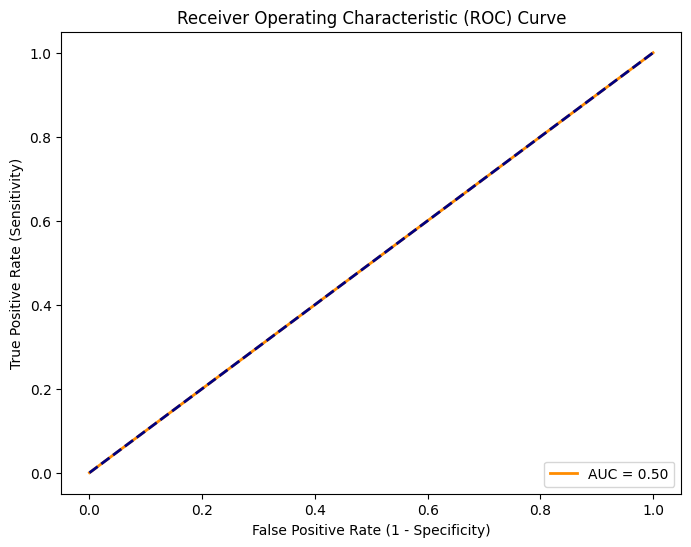

0.5

In [100]:
plot_roc_curve(y_test, y_pred_test_dum)

<Axes: >

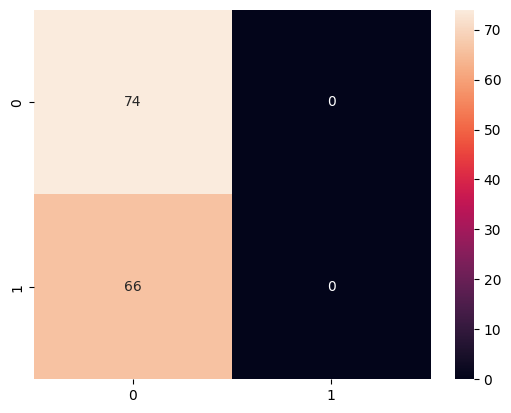

In [132]:
cm_test_dum = confusion_matrix(y_test, y_pred_test_dum)

sns.heatmap(cm_test_dum, annot=True, fmt='d')

In [133]:
cm_test_dum

array([[74,  0],
       [66,  0]], dtype=int64)

## Regresja logistyczna

In [102]:
reg = LogisticRegression()

In [103]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'fit_intercept': [True, False],
#     'class_weight': [None, 'balanced'],
#     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
#     'max_iter': [50, 100, 200],
#     'multi_class': ['ovr', 'multinomial'],
#     'random_state': [43]
# }

# grid_search = GridSearchCV(estimator=reg, param_grid=parameters)
# grid_search.fit(x_train, y_train)

# grid_search_res = pd.DataFrame(grid_search.cv_results_)
# grid_search.best_params_

#### Trenowanie modelu

Model uczy się zależności pomiędzy cechami a wartościami docelowymi, co umożliwia późniejsze dokonywanie prognoz na nowych danych.
Wykorzystujemy parametry wybrane przez GridSearch

In [104]:
reg_grid = LogisticRegression(C=100, class_weight='balanced', fit_intercept=True,
                              max_iter=50, multi_class='ovr', penalty='l1',
                              random_state=43, solver='liblinear')

In [105]:
reg_grid.fit(X_train,y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=100, class_weight='balanced', max_iter=50,
                   multi_class='ovr', penalty='l1', random_state=43,
                   solver='liblinear')

In [106]:
y_pred_reg = reg_grid.predict(X_test)
print(y_test)

[0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0]


#### Metryki

In [107]:
print_metrics(y_test, y_pred_reg)

,index,metric,value
0,test,accuracy,0.757143
1,test,precision,0.766667
2,test,recall,0.696970
3,test,f1,0.730159


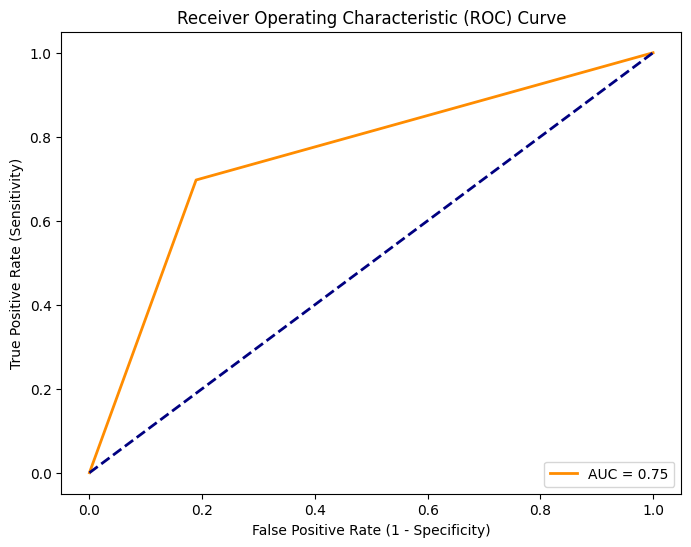

0.7538902538902538

In [108]:
plot_roc_curve(y_test, y_pred_reg)

<Axes: >

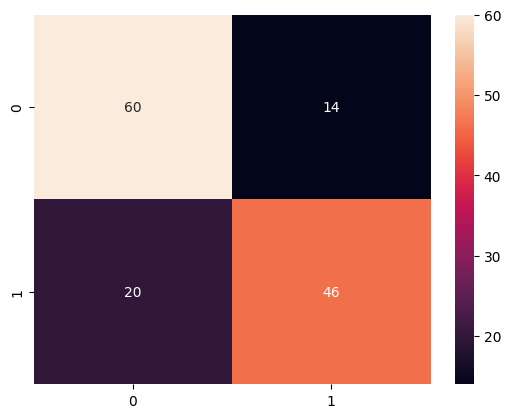

In [109]:
cm = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(cm, annot=True, fmt='d')

#### Intercept i coefficients

In [110]:
reg_grid.intercept_

array([-1.48346611])

W praktyce, reg.intercept_ reprezentuje "bazową" wartość, którą model przyjmuje, niezależnie od wartości cech wejściowych. To jest element modelu, który wprowadza pewną stałą do predykcji modelu, niezależnie od cech.

In [111]:
reg_grid.coef_

array([[ 9.35460690e+00,  6.05323640e+00,  6.08307343e+00,
         6.05173982e+00,  2.69777900e+00,  2.64245110e+00,
         2.89262957e+00,  2.53590202e+00,  7.86238642e+00,
         3.75106751e+00,  1.64996779e+00,  2.26602450e+00,
         2.80541300e+00,  2.43741823e+00,  6.07835622e+00,
        -3.58635748e+00,  6.84757657e+00,  3.96466281e+00,
         3.76213545e+00,  3.71644157e+00,  4.96083755e+00,
         3.91435848e-01,  6.43598629e+00,  8.47496237e-01,
         9.39628052e+00, -7.11789121e+00,  5.00081478e-03,
         2.15303670e-02, -2.36068538e-02, -2.58499724e-03,
         1.86879325e-02, -4.89610092e-01,  1.82036020e-01,
        -3.87065853e-01]])

Coef mówi nam, jak bardzo zmienia się zmienna docelowa w odpowiedzi na jednostkową zmianę danej cechy.

Na przykład, jeśli reg.coef_ wynosi 2, oznacza to, że przewidywana wartość zmiennej docelowej zwiększy się o 2 jednostki dla każdej jednostkowej zmiany w danej cechy.

In [112]:
feature_name = data_without_targets.columns.values

In [113]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg_grid.coef_)
summary_table

,Feature name,Coefficient
0,reason_type_1,9.354607
1,reason_type_2,6.053236
2,reason_type_3,6.083073
3,reason_type_4,6.051740
4,reason_type_5,2.697779
5,reason_type_6,2.642451
6,reason_type_7,2.892630
7,reason_type_8,2.535902
8,reason_type_9,7.862386
9,reason_type_10,3.751068


In [114]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_grid.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.483466
1,reason_type_1,9.354607
2,reason_type_2,6.053236
3,reason_type_3,6.083073
4,reason_type_4,6.051740
5,reason_type_5,2.697779
6,reason_type_6,2.642451
7,reason_type_7,2.892630
8,reason_type_8,2.535902
9,reason_type_9,7.862386


#### Interpretacja współczynników

In [115]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [116]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-1.483466,0.226850
1,reason_type_1,9.354607,11551.919531
2,reason_type_2,6.053236,425.487852
3,reason_type_3,6.083073,438.374441
4,reason_type_4,6.051740,424.851553
5,reason_type_5,2.697779,14.846720
6,reason_type_6,2.642451,14.047594
7,reason_type_7,2.892630,18.040687
8,reason_type_8,2.535902,12.627816
9,reason_type_9,7.862386,2597.712216


Sortowanie tabeli

In [117]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
25,reason_type_26,9.396281,12043.501780
1,reason_type_1,9.354607,11551.919531
9,reason_type_9,7.862386,2597.712216
17,reason_type_17,6.847577,941.596246
23,reason_type_24,6.435986,623.897625
3,reason_type_3,6.083073,438.374441
15,reason_type_15,6.078356,436.311406
2,reason_type_2,6.053236,425.487852
4,reason_type_4,6.051740,424.851553
21,reason_type_22,4.960838,142.713275


### Podsumowanie i wnioski

### Analiza wyników modelu regresji logistycznej w kontekście mierzenia absencji pracowników:

### Pozytywny Wpływ na Absencję:

Kategorie, takie jak 'reason_type_25', 'reason_type_1', 'reason_type_21', itp., mają pozytywny wpływ na absencję pracowników. Oznacza to, że pracownicy związani z tymi kategoriami mają większe szanse na wystąpienie absencji.

### Negatywny Wpływ na Absencję:

Cechy, takie jak 'Daily Work Load Average', 'Age', 'Education', itp., mają negatywny wpływ na absencję pracowników. To sugeruje, że pracownicy o wyższym obciążeniu pracą, starsi lub bardziej wykształceni, mają mniejsze szanse na absencję.

### Wpływ Bliski Neutralności:

Wartości współczynników bliskie 1 wskazują, że pewne cechy mają mniejszy wpływ na absencję pracowników.

### Interpretacja Intercept:

Intercept (-1.483466) reprezentuje bazowy poziom absencji, gdy wszystkie cechy są równe zero. Wartość ta stanowi punkt wyjścia dla predykcji modelu.

Na podstawie analizy modelu, dział HR lub zarządzania personelem może zwrócić szczególną uwagę na kategorie, które mają istotny wpływ na absencję pracowników.

Można również zidentyfikować obszary, które wydają się być skorelowane z niższym ryzykiem absencji, takie jak wyższe obciążenie pracą, wiek czy wyższe wykształcenie.

## Drzewo decyzyjne

#### Trenowanie modelu

In [118]:
# from sklearn.tree import DecissionTreeClassifier

# parameters = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# tree_model = DecisionTreeClassifier()
# grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=parameters)
# grid_search_tree.fit(X_train, y_train)
# grid_search_res_tree = pd.DataFrame(grid_search_tree.cv_results_)
# grid_search_tree.best_params_

In [119]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2, min_samples_split=10)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

#### Metryki

In [120]:
print_metrics(y_test, y_pred_tree)

,index,metric,value
0,test,accuracy,0.757143
1,test,precision,0.820000
2,test,recall,0.621212
3,test,f1,0.706897


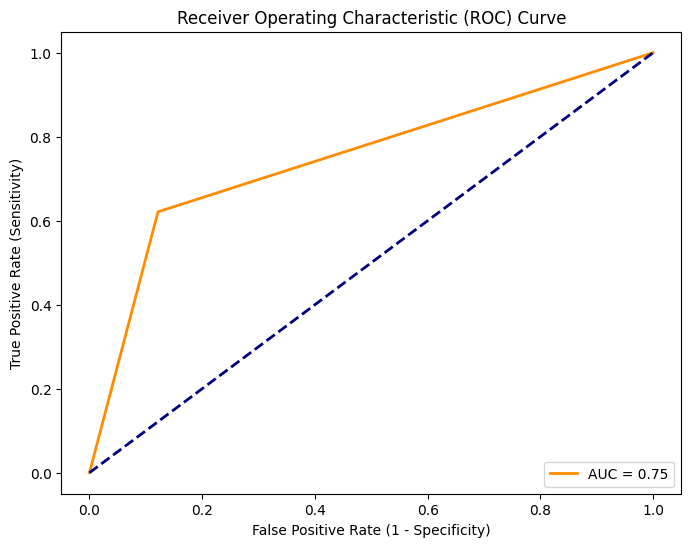

0.7497952497952497

In [121]:
plot_roc_curve(y_test, y_pred_tree)

288 to liczba prawdziwie negatywnych przypadków (True Negatives)
19 to liczba fałszywie pozytywnych przypadków (False Positives)
49 to liczba fałszywie negatywnych przypadków (False Negatives)
204 to liczba prawdziwie pozytywnych przypadków (True Positives)

<Axes: >

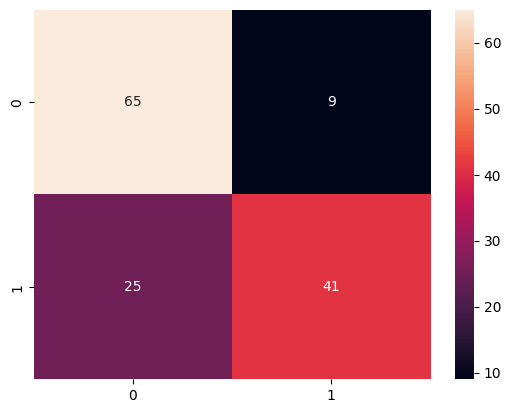

In [122]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d')

65 to liczba prawdziwie negatywnych przypadków (True Negatives)

9 to liczba fałszywie pozytywnych przypadków (False Positives)

26 to liczba fałszywie negatywnych przypadków (False Negatives)

40 to liczba prawdziwie pozytywnych przypadków (True Positives)


### Analiza i wnioski



In [123]:
importances = tree_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
29,Daily Work Load Average,0.179215
25,reason_type_27,0.135888
21,reason_type_23,0.103447
26,Transportation Expense,0.063725
28,Age,0.054515
27,Distance to Work,0.052041
24,reason_type_26,0.050687
30,Body Mass Index,0.049485
20,reason_type_22,0.037803
0,reason_type_1,0.034472


## Random Forest

#### Trenowanie modelu

In [124]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [125]:
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=parameters)
# grid_search_rf.fit(X_train, y_train)
# grid_search_res_tree = pd.DataFrame(grid_search_rf.cv_results_)
# grid_search_rf.best_params_

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='entropy',
 max_depth=30, min_samples_leaf=1,
 min_samples_split=5,
 n_estimators=50)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#### Metryki

In [127]:
print_metrics(y_test, y_pred_rf)

,index,metric,value
0,test,accuracy,0.721429
1,test,precision,0.745455
2,test,recall,0.621212
3,test,f1,0.677686


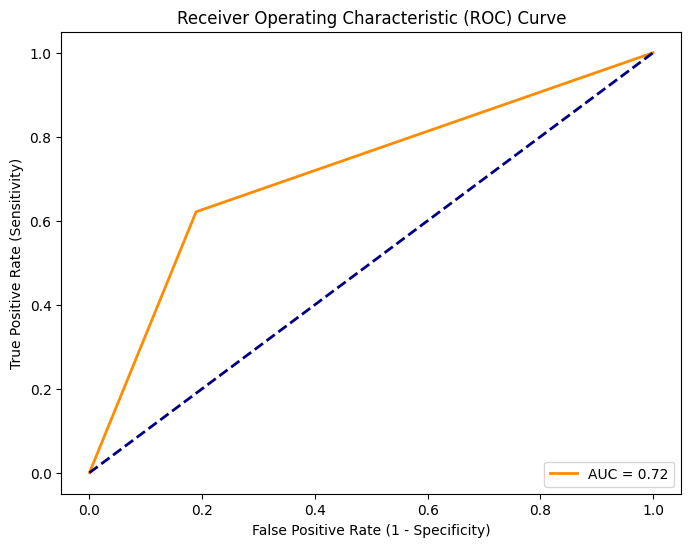

0.7160114660114658

In [128]:
plot_roc_curve(y_test, y_pred_rf)

<Axes: >

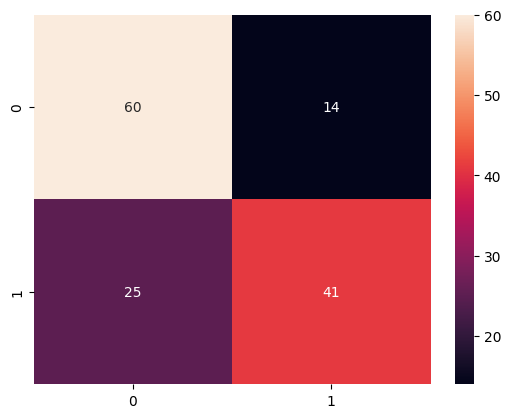

In [129]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')

#### Analiza

In [130]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
29,Daily Work Load Average,0.234624
26,Transportation Expense,0.085172
25,reason_type_27,0.074987
28,Age,0.057204
24,reason_type_26,0.052411
21,reason_type_23,0.045565
12,reason_type_13,0.043850
27,Distance to Work,0.043620
30,Body Mass Index,0.041174
20,reason_type_22,0.035855


# Wnioski końcowe

Na podstawie uzyskanych metryk "Drzewo decyzyjne" poradziło sobie najlepiej.

In [134]:
import pickle
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(tree_model, file)